In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [2]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [22]:
# Loading the dataset
df = pd.read_csv("bank-full.csv", sep=';')

In [23]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [25]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [26]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

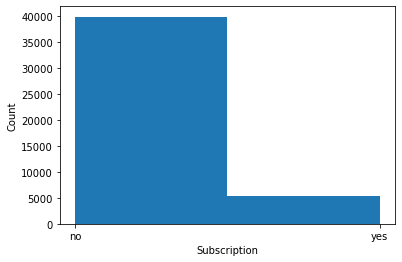

In [27]:
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
plt.hist(df['y'], bins=2)
plt.xlabel('Subscription')
plt.ylabel('Count')
plt.show()

In [28]:
num_vars= ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
cat_vars= ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

In [29]:
for col in cat_vars:
    print(df[col].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


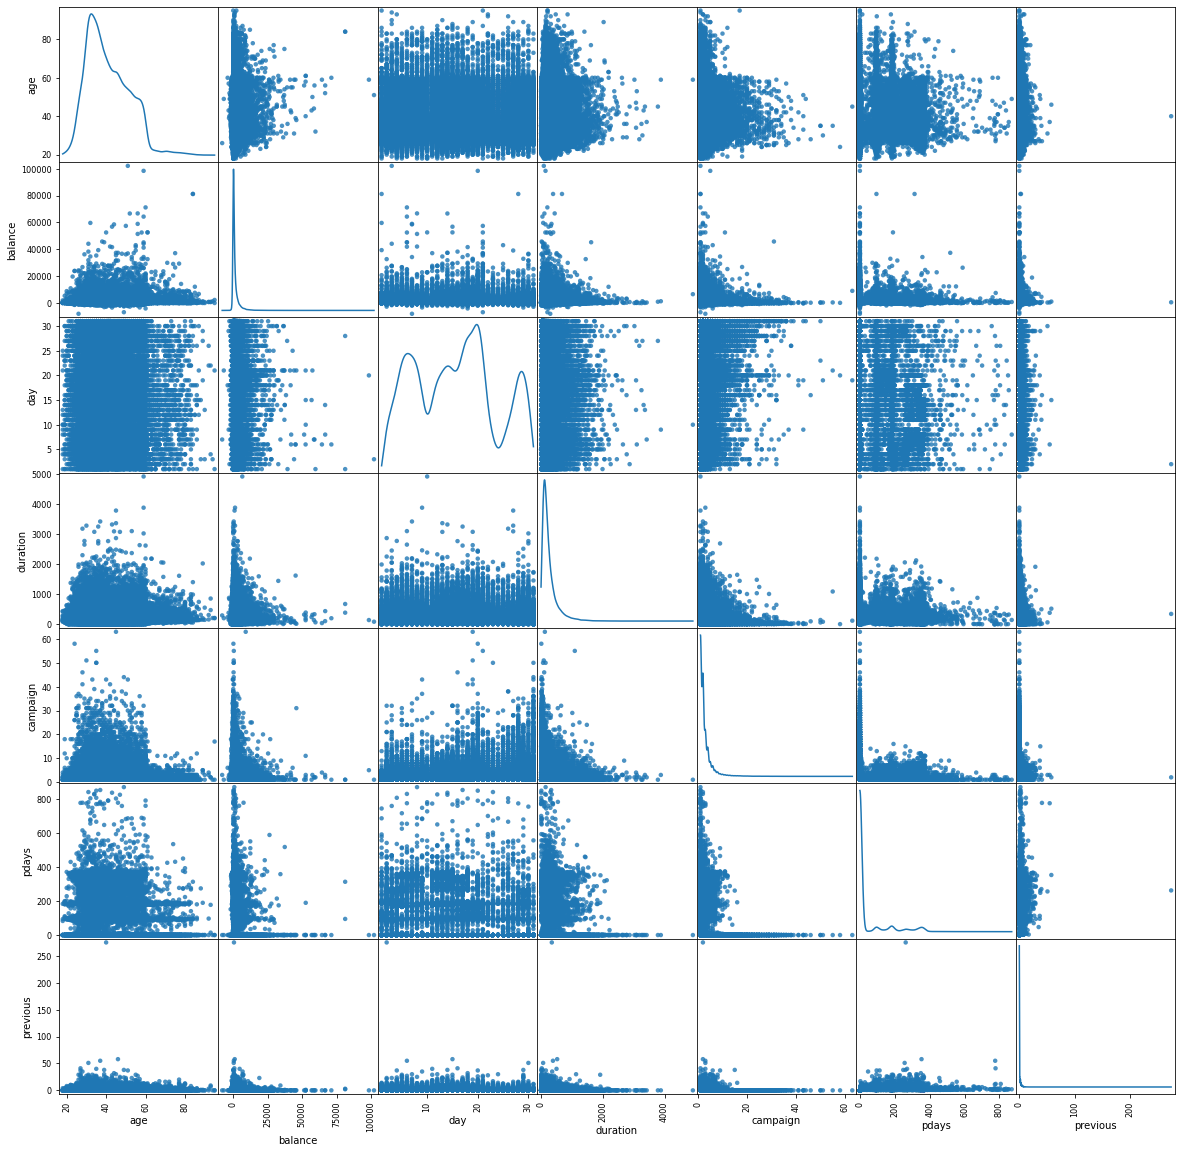

In [30]:
import matplotlib.pyplot as plt

grr = pd.plotting.scatter_matrix(df, figsize=(20, 20), marker='o', hist_kwds={'bins': 20}, s=20, alpha=.8, diagonal='kde')
plt.show()

In [31]:
dummy_data=pd.get_dummies(df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']], drop_first=True)

In [32]:
dummy_data.describe()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.00000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,0.215257,0.032890,0.027427,0.209197,0.050076,0.034925,0.09188,0.020747,0.168034,0.028820,...,0.294198,0.041074,0.018027,0.555838,0.160226,0.064276,0.287983,0.040698,0.033421,0.817478
std,0.411005,0.178351,0.163326,0.406740,0.218105,0.183592,0.28886,0.142538,0.373901,0.167303,...,0.455687,0.198464,0.133049,0.496878,0.366820,0.245247,0.452828,0.197592,0.179735,0.386278
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
x=pd.concat([df[num_vars],dummy_data], axis=1)

y=df['y'].replace({'no': 0, 'yes': 1})
y


0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [34]:
x.skew(axis=0, skipna=True)

age                     0.684818
balance                 8.360308
duration                3.144318
campaign                4.898650
pdays                   2.615715
previous               41.846454
job_blue-collar         1.385652
job_entrepreneur        5.238320
job_housemaid           5.787133
job_management          1.429986
job_retired             4.125939
job_self-employed       5.066613
job_services            2.825851
job_student             6.724846
job_technician          1.775767
job_unemployed          5.632886
job_unknown            12.409644
marital_married        -0.416493
marital_single          0.964070
education_secondary    -0.052795
education_tertiary      0.903300
education_unknown       4.624988
default_yes             7.245375
housing_yes            -0.224766
loan_yes                1.852617
contact_telephone       3.553497
contact_unknown         0.936454
poutcome_other          4.649199
poutcome_success        5.192072
poutcome_unknown       -1.643851
dtype: flo

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'job_blue-collar'}>,
        <AxesSubplot:title={'center':'job_entrepreneur'}>,
        <AxesSubplot:title={'center':'job_housemaid'}>,
        <AxesSubplot:title={'center':'job_management'}>],
       [<AxesSubplot:title={'center':'job_retired'}>,
        <AxesSubplot:title={'center':'job_self-employed'}>,
        <AxesSubplot:title={'center':'job_services'}>,
        <AxesSubplot:title={'center':'job_student'}>,
        <AxesSubplot:title={'center':'job_technician'}>],
       [<AxesSubplot:title={'center':'job_unemployed'}>,
        <AxesSubplot:title={'center':'job_unknown'}>,
        <AxesSubplot:title={'center':'marital_married'}>,
        <AxesSubplot:

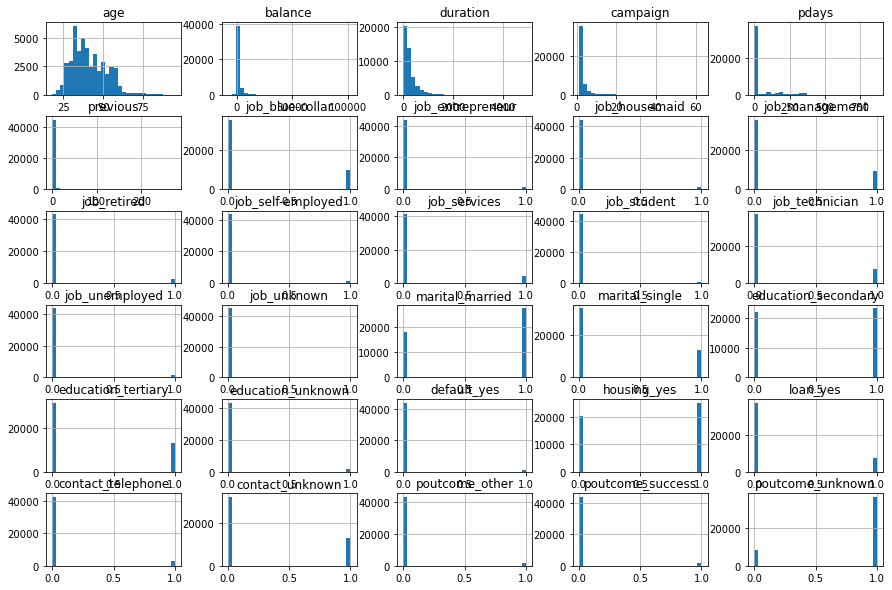

In [35]:
x.hist(bins=30, figsize=(15, 10))

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data['features']=x.columns

vif_data['VIF']=[variance_inflation_factor(x.values,i)
                          for i in range(len(x.columns))]

print(vif_data)

AttributeError: module 'numpy' has no attribute 'MachAr'

In [37]:
x.corr()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
age,1.000000,0.097783,-0.004648,0.004760,-0.023758,0.001288,-0.044002,0.021792,0.086650,-0.023571,...,-0.081629,0.069665,-0.017879,-0.185513,-0.015655,0.170349,-0.020132,-0.022967,0.035526,-0.000816
balance,0.097783,1.000000,0.021560,-0.014578,0.003435,0.016674,-0.048757,0.009642,0.001661,0.067797,...,0.084001,0.011181,-0.066745,-0.068768,-0.084350,0.037999,-0.037331,0.008466,0.035240,-0.030271
duration,-0.004648,0.021560,1.000000,-0.084570,-0.001565,0.001203,0.009637,-0.001327,-0.008046,-0.008323,...,0.000891,-0.000682,-0.010021,0.005075,-0.012412,-0.023201,-0.014379,-0.001958,0.042389,-0.003491
campaign,0.004760,-0.014578,-0.084570,1.000000,-0.088628,-0.032855,0.008986,0.002128,0.003097,0.016686,...,0.012866,0.005704,0.016822,-0.023599,0.009980,0.053895,0.004853,-0.020107,-0.057486,0.107965
pdays,-0.023758,0.003435,-0.001565,-0.088628,1.000000,0.454820,0.020063,-0.014203,-0.031350,-0.007871,...,-0.007568,-0.006907,-0.029979,0.124178,-0.022754,0.016006,-0.247068,0.389791,0.228539,-0.869962
previous,0.001288,0.016674,0.001203,-0.032855,0.454820,1.000000,-0.017095,-0.008181,-0.015204,0.019579,...,0.022888,-0.008257,-0.018329,0.037076,-0.011043,0.028097,-0.154162,0.306615,0.201424,-0.532763
job_blue-collar,-0.044002,-0.048757,0.009637,0.008986,0.020063,-0.017095,1.000000,-0.096585,-0.087951,-0.269376,...,-0.320541,0.014715,0.010341,0.177475,0.018291,-0.003190,0.138141,0.001342,-0.053074,0.022194
job_entrepreneur,0.021792,0.009642,-0.001327,0.002128,-0.014203,-0.008181,-0.096585,1.000000,-0.030969,-0.094850,...,0.067639,0.009325,0.026281,0.010600,0.039808,-0.004338,0.004867,-0.013506,-0.019111,0.014901
job_housemaid,0.086650,0.001661,-0.008046,0.003097,-0.031350,-0.015204,-0.087951,-0.030969,1.000000,-0.086372,...,-0.057004,-0.004048,-0.000359,-0.079380,-0.017234,0.039371,-0.004815,-0.016769,-0.009375,0.026059
job_management,-0.023571,0.067797,-0.008323,0.016686,-0.007871,0.019579,-0.269376,-0.094850,-0.086372,1.000000,...,0.598900,-0.040137,-0.002655,-0.063382,-0.038904,-0.030362,-0.090999,0.002223,0.021453,-0.013755


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val=train_test_split(x,y, test_size=0.2, random_state=0)

In [18]:
y = df['y'].replace({'no': 0, 'yes': 1})
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [39]:
X_train.describe()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
count,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,...,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000
mean,40.922169,1372.101969,257.749115,2.754977,39.982056,0.583720,0.214250,0.033151,0.026764,0.211319,...,0.295067,0.040201,0.018165,0.553970,0.159616,0.064975,0.285971,0.040395,0.032764,0.818099
std,10.612148,3082.892182,257.751281,3.090682,99.903540,2.418046,0.410307,0.179033,0.161395,0.408250,...,0.456079,0.196434,0.133551,0.497086,0.366255,0.246484,0.451882,0.196886,0.178020,0.385768
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,449.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,1433.000000,318.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
import statsmodels.api as sm
log_reg=sm.Logit(y_train, x_train).fit()

AttributeError: module 'numpy' has no attribute 'MachAr'

In [74]:
regressor_list = [LogisticRegression(),
                  RandomForestRegressor(n_estimators=1000),
                  GradientBoostingRegressor()]

In [75]:
for reg in regressor_list:
    pipeline = Pipeline(steps=[('regressor', reg)])
    model_pipeline = pipeline.fit(X_train, y_train)
    preds = model_pipeline.predict(X_val)
    lr_auc=roc_auc_score(y_val, preds)
    print('Logistic: ROC AUc = %.3f'%(lr_auc))
    
   

C:\Users\Eswara Sai Sumanth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic: ROC AUc = 0.593


KeyboardInterrupt: 

In [41]:
print(log_reg.summary())

NameError: name 'log_reg' is not defined

In [42]:
from sklearn.metrics import confusion_matrix

prediction_prob=log_reg.predict(x_val)

prediction =list(map(round, prediction_prob))
confusion_matrix(y_val, prediction)

NameError: name 'log_reg' is not defined

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

lr_auc=roc_auc_score(y_val, prediction_prob)
print('Logistic: ROC AUc = %.3f'%(lr_auc))

In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_val, prediction_prob)
plt.plot(lr_fpr, lr_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict_proba(x_val)[:,1]
rf_auc = roc_auc_score(y_val, y_pred_rf)

In [ ]:
print("Random Forest AUC:", rf_auc)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_val, y_val)

In [ ]:
rf.score(x_val, y_val)

In [ ]:
# NN

In [ ]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_val = torch.from_numpy(X_val.astype(np.float32))
y_train=np.array(y_train)
y_val=np.array(y_val)
y_train = torch.from_numpy(y_train.astype(np.float32))
y_val = torch.from_numpy(y_val.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_val = y_val.view(y_val.shape[0], 1)

In [ ]:
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
    
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted

In [ ]:
n_samples, n_features = x.shape
model = LogisticRegression(n_features)

In [ ]:
learning_rate = 0.01

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
num_epochs = 1000
for epoch in range(num_epochs):
    #Forward and Loss
    y_predicted = model.forward(X_train)
    loss = criterion(y_predicted, y_train)
    
    #Backward and Update
    loss.backward()
    optimizer.step()
    
    #Zero
    optimizer.zero_grad()
    
    #Logging
    if (epoch + 1) % 100 == 0:
        print(f'Epoch: {epoch + 1} Loss: {loss:.8f}.')

In [ ]:
with torch.no_grad():
    y_test_pred = model.forward(X_val)
    test_loss = criterion(y_test_pred, y_val)
    
    y_pred_val_rounded = torch.round(y_test_pred)
    acc_val = (y_pred_val_rounded == y_val).sum().float() / len(y_val)

   acc_val